In [198]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier


In [180]:
filename = 'data_evaluacion.csv'
#filename='data.csv'
df = pd.read_csv(filename)
print (df.shape)
df.head(5)

(48841, 15)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [181]:
#df.nunique()

In [182]:
#Dar nombres a las columnas
nombre_columna = ['edad', 'empleador_tipo', 'peso', 'educacion', 'numero_educacion', 'estado_civil', 
                'ocupacion', 'relacion', 'raza', 'sexo', 'ganancia', 'perdida', 
                'horas_semana', 'pais_natal', 'ingresos']

df.columns=nombre_columna


In [183]:
#reemplazamos los registos ? con valores nulos
df[df == '?'] = np.nan
df.info()

for col in ['empleador_tipo', 'ocupacion', 'pais_natal']:
    mode_value = df[col].mode()[0]  
    df[col] = df[col].fillna(mode_value) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edad              48841 non-null  int64 
 1   empleador_tipo    46042 non-null  object
 2   peso              48841 non-null  int64 
 3   educacion         48841 non-null  object
 4   numero_educacion  48841 non-null  int64 
 5   estado_civil      48841 non-null  object
 6   ocupacion         46032 non-null  object
 7   relacion          48841 non-null  object
 8   raza              48841 non-null  object
 9   sexo              48841 non-null  object
 10  ganancia          48841 non-null  int64 
 11  perdida           48841 non-null  int64 
 12  horas_semana      48841 non-null  int64 
 13  pais_natal        47984 non-null  object
 14  ingresos          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [184]:
#df.nunique()

In [185]:
#Ver si existen datos nulos
#df.isnull().sum()

In [186]:
#Dividir las variables x y y

x = df.drop('ingresos', axis=1)
y = df['ingresos']


In [187]:
categorizar = ['sexo', 'raza', 'empleador_tipo', 'educacion', 'estado_civil', 'ocupacion', 'relacion', 'pais_natal']

# Crear una instancia de LabelEncoder
le = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica
for col in categorizar:
    x[col] = le.fit_transform(x[col])

#Get dami
#x = pd.get_dummies(x, columns=categorizar)

x

,edad,empleador_tipo,peso,educacion,numero_educacion,estado_civil,ocupacion,relacion,raza,sexo,ganancia,perdida,horas_semana,pais_natal
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,3,215419,9,13,0,9,1,4,0,0,0,36,38
48837,64,3,321403,11,9,6,9,2,2,1,0,0,40,38
48838,38,3,374983,9,13,2,9,0,4,1,0,0,50,38
48839,44,3,83891,9,13,0,0,3,1,1,5455,0,40,38


In [188]:
#Dividir en daos de prueba y entrenamiento

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [189]:
#Normalizar
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [190]:
arbol = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
#arbol = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
arbol.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [191]:
# Evalaucion del modelo
y_pred=arbol.predict(x_test)
print('Train Accuracy : %.5f' % arbol.score(x_train, y_train))
print('Test Accuracy : %.5f' % arbol.score(x_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy : 0.86036
Test Accuracy : 0.85928
Precisión del modelo: 0.8592779635569507
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91     11147
        >50K       0.78      0.57      0.66      3506

    accuracy                           0.86     14653
   macro avg       0.83      0.76      0.78     14653
weighted avg       0.85      0.86      0.85     14653



In [196]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10602,   545],
       [ 1517,  1989]], dtype=int64)

<Figure size 5000x2000 with 0 Axes>

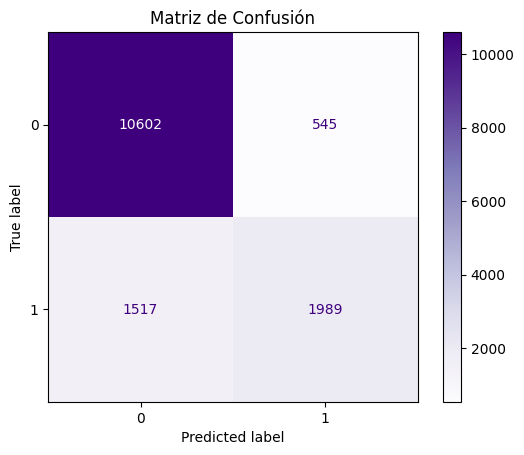

In [200]:
import matplotlib.ticker as ticker
plt.figure(figsize=(50, 20))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Purples, values_format='d') 
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Matriz de Confusión')
plt.show()

In [193]:
x_n=np.asarray([50,	6,83311,9,13,2,4,0,4,1,0,0,13,39]).reshape(1,-1)
predict=arbol.predict(x_n)
predict[0]

'>50K'

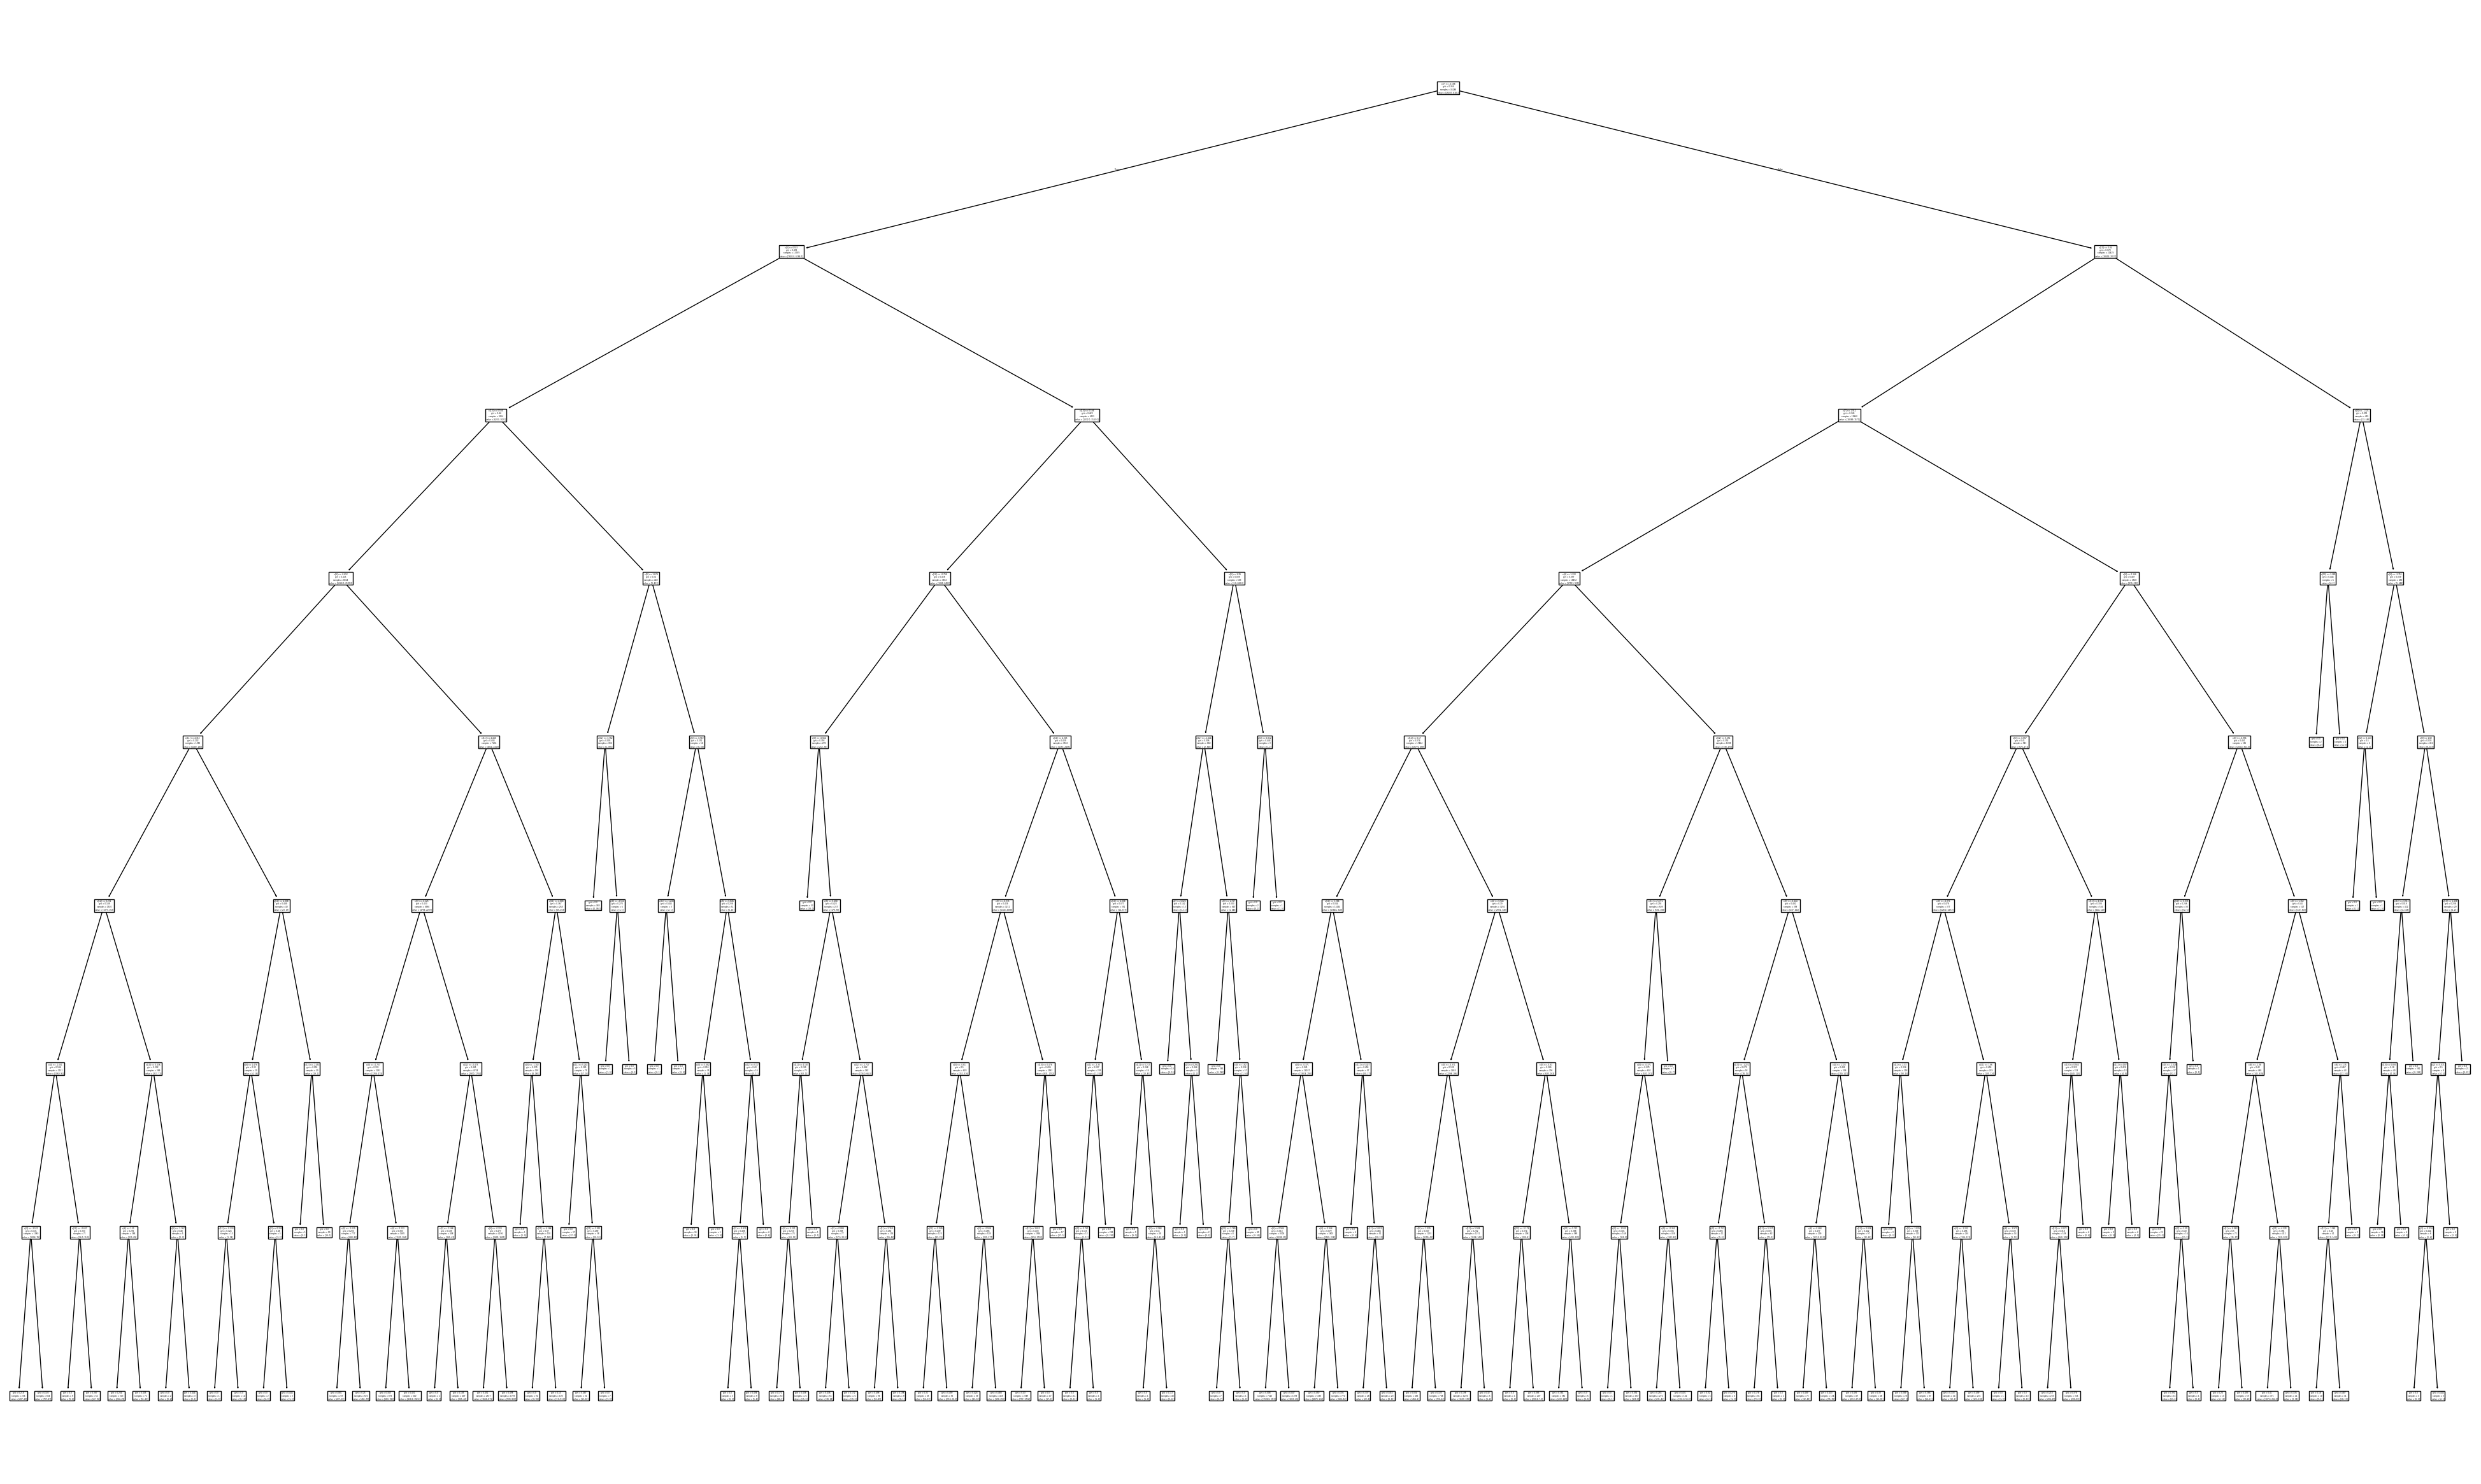

In [194]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,30))
tree.plot_tree(arbol)
plt.show()

## Bibliografia

### Navlani, A. (2024, January 29). Tutorial de Clasificación en Árbol de Decisión en Python. https://www.datacamp.com/es/tutorial/decision-tree-classification-python